<a href="https://colab.research.google.com/github/yogesh458/Assignment/blob/main/ML_Car_Price_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
# Import the dataset.
training_df = pd.read_csv('/content/ML_Car_Price_1.csv')


# Print the first rows of the pandas DataFrame.
training_df.head()



,Year,Kms,Showroom_Price,Present_Price
0,2000.0,1000.0,5.0,5.0
1,2000.0,2000.0,5.0,4.9
2,2000.0,3000.0,5.0,4.9
3,2000.0,4000.0,5.0,4.9
4,2000.0,5000.0,5.0,4.8


In [ ]:
#check for presence of None in any column of the dataframe
print(training_df.isnull().values.any())

#provides sum of NA from each column
training_df.isna().sum()

True


Year              2
Kms               2
Showroom_Price    2
Present_Price     2
dtype: int64

In [ ]:
# dropna(inplace = True) will remove all rows containing NULL values from the original DataFrame.
training_df.dropna(inplace = True)

In [ ]:
#To discover duplicates, we can use the duplicated() method. The duplicated() method returns a Boolean values for each row.
print(training_df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
135    False
136    False
137    False
138    False
139    False
Length: 138, dtype: bool


In [ ]:
#Remove all duplicates: The (inplace = True) will make sure that the method does NOT return a new DataFrame, but it will remove all duplicates from the original DataFrame.
training_df.drop_duplicates(inplace = True)

In [ ]:
#check for presence of None in any column of the dataframe
print(training_df.isnull().values.any())

#provides sum of NA from each column
training_df.isna().sum()

False


Year              0
Kms               0
Showroom_Price    0
Present_Price     0
dtype: int64

In [ ]:
#To discover duplicates, we can use the duplicated() method. The duplicated() method returns a Boolean values for each row.
print(training_df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
135    False
136    False
137    False
138    False
139    False
Length: 136, dtype: bool


In [ ]:
# Print the first rows of the pandas DataFrame.
training_df.head()

,Year,Kms,Showroom_Price,Present_Price
0,2000.0,1000.0,5.0,5.0
1,2000.0,2000.0,5.0,4.9
2,2000.0,3000.0,5.0,4.9
3,2000.0,4000.0,5.0,4.9
4,2000.0,5000.0,5.0,4.8


In [ ]:
training_df.corr()

,Year,Kms,Showroom_Price,Present_Price
Year,NaN,NaN,NaN,NaN
Kms,NaN,1.0,NaN,-1.0
Showroom_Price,NaN,NaN,NaN,NaN
Present_Price,NaN,-1.0,NaN,1.0


In [ ]:
#Delete column 'Year' as it has no correlation with other data and can't be used for training and prediction
del training_df['Year']
del training_df['Showroom_Price']
print(training_df)
training_df.corr()

         Kms  Present_Price
0     1000.0            5.0
1     2000.0            4.9
2     3000.0            4.9
3     4000.0            4.9
4     5000.0            4.8
..       ...            ...
135 132000.0            0.6
136 133000.0            0.6
137 134000.0            0.5
138 135000.0            0.5
139 136000.0            0.5

[136 rows x 2 columns]


,Kms,Present_Price
Kms,1.0,-1.0
Present_Price,-1.0,1.0


In [ ]:
# Get statistics on the dataset.
training_df.describe()

,Kms,Present_Price
count,136.0,136.0
mean,68500.0,2.7
std,39403.9,1.3
min,1000.0,0.5
25%,34750.0,1.6
50%,68500.0,2.7
75%,102250.0,3.8
max,136000.0,5.0


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 100 random points of the dataset.
  random_examples = training_df.sample(n=100)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/50
28/28 [==============================] - 1s 2ms/step - loss: 5721781760.0000 - root_mean_squared_error: 75642.4609
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 755124928.0000 - root_mean_squared_error: 27479.5371
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 8745154.0000 - root_mean_squared_error: 2957.2207
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 11.7091 - root_mean_squared_error: 3.4219
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 857857.0625 - root_mean_squared_error: 926.2057
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 1096145.1250 - root_mean_squared_error: 1046.9695
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 1333852.0000 - root_mean_squared_error: 1154.9250
Epoch 8/50
28/28 [==============================] - 0s 2ms/step - loss: 583546.1875 - root_mean_squared_error: 763.9020
Epoch 9/50
28/28 [===========

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


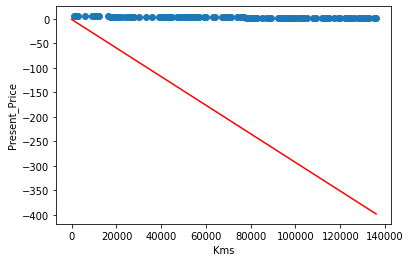

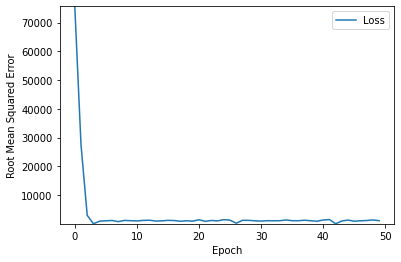

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.03
epochs = 50
batch_size = 5

# Specify the feature and the label.

#########################################################################
#First execute without below line and observe that predication doesn't match actual values 
#as Kms is a large number compared to Present_Price
#training_df['Kms']=training_df['Kms']/1000

#########################################################################

my_feature = "Kms"  # the total number of rooms on a specific city block.
my_label="Present_Price" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

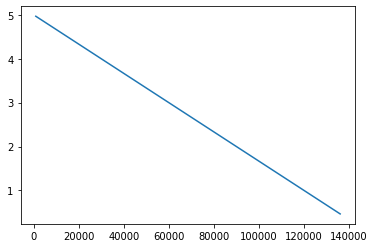

In [ ]:
plt.plot(training_df['Kms'],training_df['Present_Price'])

In [ ]:
def predict_car_values(n, feature, label):
  """Predict car values based on a feature."""

  batch = training_df[feature][100:100 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature      label          predicted")
  print("  kms     SellingPrice        price  ")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.2f %6.2f %15.2f" % (training_df[feature][100 + i],
                                   training_df[label][100 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_car_values(5, my_feature, my_label)

feature      label          predicted
  kms     SellingPrice        price  
--------------------------------------
98000.00   1.73         -296.09
99000.00   1.70         -299.00
100000.00   1.67         -301.92
101000.00   1.63         -304.83
102000.00   1.60         -307.75


         Kms  Present_Price  kms_scaled_1000  Synthetic_Feature
0     1000.0            5.0              1.0                1.0
1     2000.0            4.9              2.0                2.0
2     3000.0            4.9              3.0                3.0
3     4000.0            4.9              4.0                4.0
4     5000.0            4.8              5.0                5.0
..       ...            ...              ...                ...
135 132000.0            0.6            132.0              132.0
136 133000.0            0.6            133.0              133.0
137 134000.0            0.5            134.0              134.0
138 135000.0            0.5            135.0              135.0
139 136000.0            0.5            136.0              136.0

[136 rows x 4 columns]
Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 15893.6836 - root_mean_squared_error: 126.0702
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 14030.1533 - ro

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


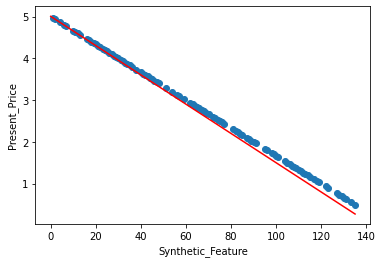

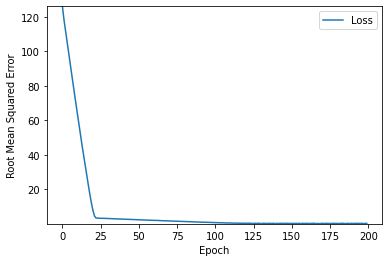

feature      label          predicted
  kms     SellingPrice        price  
--------------------------------------
98.00   1.73            1.47
99.00   1.70            1.43
100.00   1.67            1.40
101.00   1.63            1.36
102.00   1.60            1.33


In [ ]:
# Define a synthetic feature
training_df["kms_scaled_1000"] = training_df["Kms"]/1000

training_df["Synthetic_Feature"] = training_df["kms_scaled_1000"]

my_feature = "Synthetic_Feature"
my_label="Present_Price"

print(training_df)

# Tune the hyperparameters.

#learning_rate = 0.005(correct)
learning_rate = 0.006

#epochs = 150(correct)
epochs = 200

#batch_size = 10(correct)
batch_size = 10

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, mae)
predict_car_values(5, my_feature, my_label)